In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Introduction**

Zalando, a fashion e-commerce company based in Berlin, Germany, has operations in several European countries. The company noticed that the standard MNIST dataset is easy for most advanced neural nets,Zalando is looking to replace the original MNIST dataset. so they decided to create a more difficult set. .This data set was gotten from Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download

This task will be carried out using CNN. CNN stands for Convolutional Neural Network, which is a type of deep learning algorithm commonly used in image recognition and classification tasks. It consists of multiple layers of interconnected neurons that are designed to recognize patterns and features in images, allowing the network to classify images into different categories. CNNs are particularly useful for tasks such as object detection and image segmentation, and have been widely used in applications such as image search engines, facial recognition systems, and self-driving cars. In this task, I'll be using it in a fashion Scenario.


#**Dataset**

**Importing modules**

In [ ]:
import numpy as np                                   #  for linear algebra
import pandas as pd  
import seaborn as sns                                #processing data, and reading csv file)
import matplotlib.pyplot as plt                      # for plotting data
from sklearn.model_selection import train_test_split # to split data set into training and testing sets
import warnings                                      # libraries to limit  warnings
warnings.filterwarnings("ignore")

import keras # main keras package
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, AveragePooling2D # layers with layers operations
from keras.layers import Dense,Conv2D  # layers types
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D



**Loading the dataset**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv')

In [ ]:
df_train.head()  #checking the head of our dataset.

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df_train)

60000

It can be useful to examine the distribution of pixel values by creating a histogram of a subset of 1000 images using the matplotlib histogram function. The "histtype" parameter can be set to "step" to reduce computation time.

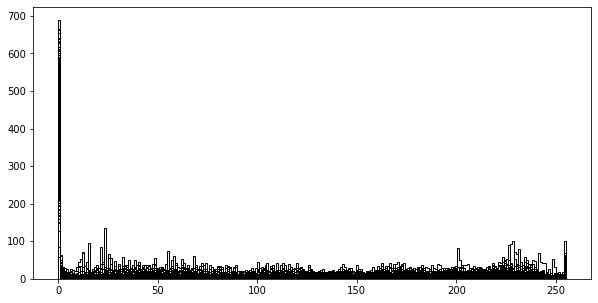

In [ ]:

subset_1 = df_train.iloc[:1000,1:]
plt.subplots(figsize=(10,5))
plt.hist(subset_1, bins=256, fc='k', ec='k',histtype='step')
plt.show()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

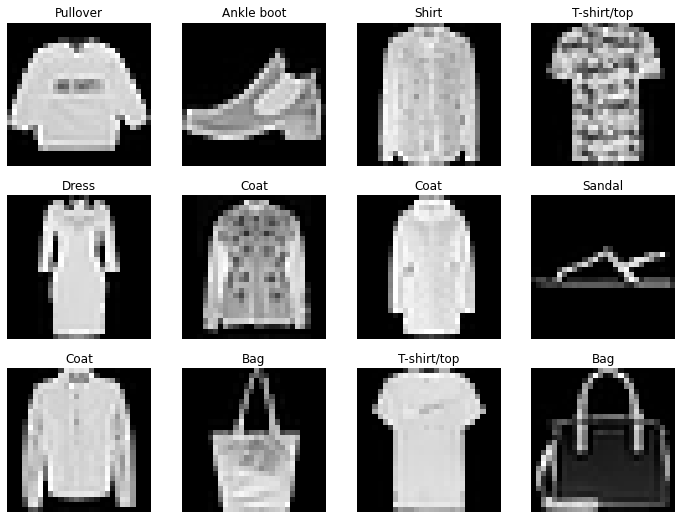

In [ ]:
plt.figure(figsize=(12,9))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    image_resized = np.resize(df_train.iloc[i,1:].values,(28,28))
    plt.title(class_names[df_train.iloc[i,0]])
    plt.imshow(image_resized, cmap='gray', interpolation='none')
    plt.axis('off')

# Converting the dataframe to a numpy arrays

To prepare the data for machine learning, we need to convert the images' labels from a dataframe to a numpy array. The labels are categorical, so we need to one-hot encode them. This can be done using functions such as keras' to_categorical, pandas' get_dummies, or sklearn's OneHotEncoder.

---







In [ ]:
X = np.array(df_train.iloc[:, 1:])
y = pd.get_dummies(np.array(df_train.iloc[:, 0]))

# Validation split

Sklearn train_test_split will be used to perform this operation. In this case, it will be more like train-validation split as this validation set will be used during the compilation of the model. The real test set will be presented in a separate .csv file.

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

**Reshaping and splitting the data before using it on CNN**

The data consists of 28x28 pixel, black and white images with only one channel. If the images were colored, there would be three channels (RGB). To build a successful CNN model, it is necessary to split the data into three sets: training, validation, and test. In this case, the validation set will be created explicitly, but if the data is shuffled, the validation_split parameter can be used when fitting the model.



In [ ]:
im_rows, im_cols = 28, 28
input_shape = (im_rows, im_cols, 1)

# Test data
X_test = np.array(df_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(df_test.iloc[:, 0]))

# train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1)
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)

# normalisation
X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

print("X_train shape:", X_train.shape)
print("X_validate shape:", X_validate.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_validate.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48000, 28, 28, 1)
X_validate shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_validate shape: (12000, 10)
y_test shape: (10000, 10)




#**Chosen Algorithm for comparison**

For the purpose of the comparison given in the task, the LeNet and AlexNet Algorithms will be considered.

LeNet is a type of convolutional neural network (CNN) developed by Yann LeCun in the late 1980s and early 1990s. It was originally designed to recognize handwritten digits from images, and was one of the first successful applications of CNNs in this field. LeNet consists of multiple layers of interconnected neurons, with each layer responsible for extracting different features from the input data. It uses a combination of convolutional, pooling, and fully connected layers to extract relevant features and make predictions based on those features. LeNet has been widely used in various image recognition and classification tasks, and has served as a foundation for many other CNN architectures that have been developed since its inception.

AlexNet is a convolutional neural network (CNN) developed by Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever in 2012. It was the winning model in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012, and is considered a key milestone in the development of deep learning algorithms for image recognition.

The AlexNet architecture consists of five convolutional layers, three fully-connected layers, and a final output layer. The convolutional layers are responsible for extracting features from the input image, while the fully-connected layers classify the image based on those features. AlexNet also introduced the use of ReLU activation functions, which greatly improved the training speed of the network compared to traditional sigmoid or tanh activation functions.


#**Training ,Testing and Modelling of the FMNIST dataset with LeNet and AlexNet Algorithm**

In [ ]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(120, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))

**Compiling the CNN model**


ADAM is an optimizer that can be used in machine learning.In this task,, I'll use the categorical_crossentropy loss function.The metric for evaluating the performance of the model will be the accuracy."

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

**Summary of the model**

it is important to show the summary of the model so as to know how many trainable parameters are contained in our model.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

**Model Fitting with the training data**


In [ ]:
tracker = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    validation_data=(X_validate, y_validate),
                    verbose=0)

**Evaluation of the model with the test data**

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6008779406547546
Test accuracy: 0.895799994468689


**The Accuracy score using LeNet model is 0.89**

**AlexNet**

In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(28,28,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(1,1),strides=(1,1)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(1,1),strides=(1,1)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 7, 7, 16)          160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 60)          24060     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 60)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 60)          32460     
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 30)         

In [ ]:
tracker2 = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    validation_data=(X_validate, y_validate),
                    verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8743560314178467
Test accuracy: 0.901199996471405


The Accuracy score using AlexNet model is 0.90



#**Performance of the chosen Algorithm**

**LeNet**

It is of great importance to check  learning process of the model. This is done here by accessing its history with the ".history attribute" of previously defined tracker. It is good to examine  how the loss function was developing for both the testing and validation sets. ao as to know if there is a problem with overfitting -  the test set loss function would decrease while validation's loss function after attaining a minimum value will starts to increase again.

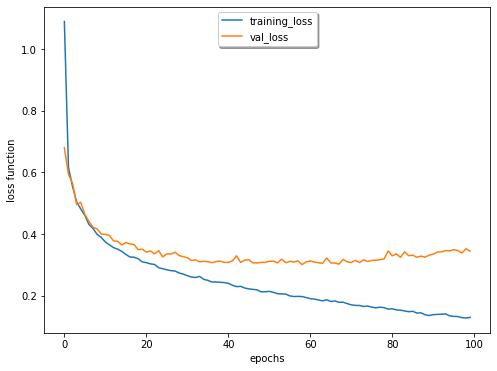

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
plt.title("loss by AlexNet on Data")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

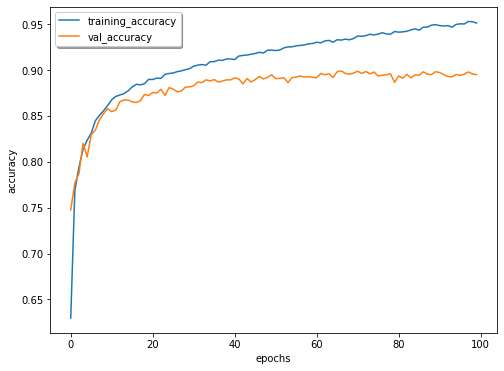

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tracker.history["accuracy"], label = "training_accuracy")
plt.title("Accuracy by LeNet on FMNIST Data")
ax.plot(tracker.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

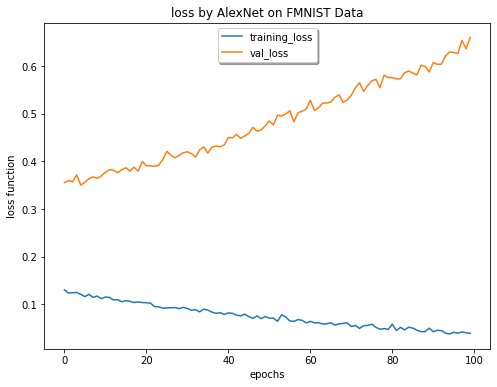

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.title("loss by AlexNet on FMNIST Data")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

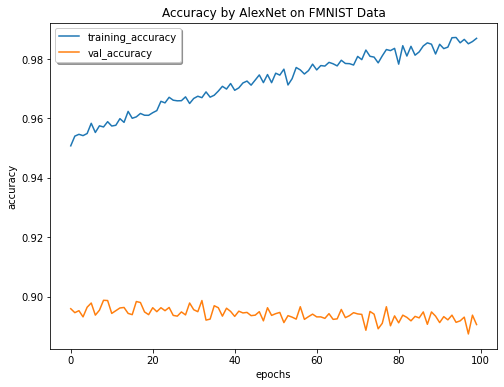

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tracker.history["accuracy"], label = "training_accuracy")
plt.title("Accuracy by AlexNet on FMNIST Data")
ax.plot(tracker.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

# **conclusion**

The performance of Lenet model is quite lesser than AlexNet model.The AlexNet model had a better accuracy of 0.90 using the FMNIST data. . 

# **Reference**

* Dataset Source: https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download
*classification model LeNet and AlexNet on CIFAR10: https://www.kaggle.com/code/raibabar/classification-model-lenet-and-alexnet-on-cifar10
* Fashion MNIST classification with LeNET in Keras: https://www.kaggle.com/code/datark1/fashion-mnist-classification-with-lenet-in-keras